In [488]:
# Wymagane biblioteki
!pip install pandas
!pip install scipy
!pip install plotly

# Badane dane

In [489]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import shapiro
import plotly.express as px

In [490]:
# Wybór badanych kolumn
cols = [0, 670, 2, 3, 4] + [i for i in range(550, 610)]

data = pd.read_csv('data/graduates-major-data.csv', sep=';', usecols=cols)
data.insert(1, column='P_KIERUNEK_NAZWA', value=data.pop('P_KIERUNEK_NAZWA'))

# Zamiana ',' na '.' w danych liczbowych
for i in range(5, data.shape[1]):
    data.iloc[:, i] = pd.to_numeric(data.iloc[:, i].str.replace(',', '.'))

# Uwzględnienie tylko danych z "informatyka" w nazwie kierunku
data = data[data['P_KIERUNEK_NAZWA'].str.contains('informatyka') | data['P_KIERUNEK_NAZWA'].str.contains('Informatyka')]
# Uwzględnienie tylko danych z ilościa absolwentów większą lub równą 25
data = data[data['P_N'] >= 25]

data.head()

,P_ROKDYP,P_KIERUNEK_NAZWA,P_POZIOM,P_FORMA,P_N,P_WWZ_MIES_1,P_WWZ_MIES_2,P_WWZ_MIES_3,P_WWZ_MIES_4,P_WWZ_MIES_5,...,P_WWZ_MIES_51,P_WWZ_MIES_52,P_WWZ_MIES_53,P_WWZ_MIES_54,P_WWZ_MIES_55,P_WWZ_MIES_56,P_WWZ_MIES_57,P_WWZ_MIES_58,P_WWZ_MIES_59,P_WWZ_MIES_60
45,2014,Informatyka,2,N,28,1.00,1.22,1.15,1.07,1.10,...,1.62,1.56,1.60,1.46,1.41,1.44,1.67,1.51,1.77,1.55
92,2014,Informatyka,2,S,54,1.02,1.15,1.16,1.07,1.21,...,1.88,1.78,1.79,2.08,1.86,1.97,2.08,2.04,1.92,2.06
115,2014,Informatyka,1,S,30,0.33,0.23,0.40,0.30,0.62,...,0.83,0.93,0.82,0.89,0.86,0.83,0.80,0.83,0.90,0.81
124,2014,Informatyka,1,S,36,0.31,0.40,0.49,0.45,0.47,...,0.80,0.89,0.90,0.98,0.89,0.95,0.95,1.04,0.86,0.86
202,2015,Informatyka,2,S,95,0.93,0.86,0.84,0.97,0.85,...,1.48,1.54,1.47,1.51,1.70,1.55,1.55,1.50,1.42,1.58


# Eksploracja danych

In [491]:
description = data.describe()
description

,P_ROKDYP,P_N,P_WWZ_MIES_1,P_WWZ_MIES_2,P_WWZ_MIES_3,P_WWZ_MIES_4,P_WWZ_MIES_5,P_WWZ_MIES_6,P_WWZ_MIES_7,P_WWZ_MIES_8,...,P_WWZ_MIES_51,P_WWZ_MIES_52,P_WWZ_MIES_53,P_WWZ_MIES_54,P_WWZ_MIES_55,P_WWZ_MIES_56,P_WWZ_MIES_57,P_WWZ_MIES_58,P_WWZ_MIES_59,P_WWZ_MIES_60
count,1111.000000,1111.000000,1099.000000,1102.000000,1102.000000,1102.000000,1104.000000,1105.000000,1107.000000,1108.000000,...,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000
mean,2016.606661,56.940594,0.939463,0.992795,1.017713,1.033158,1.062654,1.080163,1.094155,1.111616,...,1.596064,1.585073,1.612915,1.614927,1.614373,1.651778,1.650933,1.657930,1.651691,1.654402
std,1.704026,34.045360,0.379958,0.365998,0.361295,0.358087,0.362822,0.363605,0.362234,0.360510,...,0.458668,0.440163,0.439096,0.460048,0.438326,0.468126,0.461722,0.457517,0.453234,0.469327
min,2014.000000,25.000000,0.000000,0.160000,0.130000,0.000000,0.130000,0.260000,0.120000,0.260000,...,0.680000,0.650000,0.680000,0.660000,0.720000,0.650000,0.750000,0.760000,0.720000,0.680000
25%,2015.000000,33.000000,0.680000,0.730000,0.770000,0.780000,0.800000,0.820000,0.840000,0.860000,...,1.230000,1.240000,1.280000,1.280000,1.265000,1.315000,1.315000,1.300000,1.300000,1.325000
50%,2017.000000,45.000000,0.920000,0.960000,0.990000,1.010000,1.030000,1.040000,1.050000,1.070000,...,1.550000,1.540000,1.580000,1.570000,1.560000,1.610000,1.600000,1.610000,1.620000,1.620000
75%,2018.000000,69.500000,1.160000,1.220000,1.220000,1.250000,1.280000,1.300000,1.310000,1.340000,...,1.915000,1.920000,1.895000,1.900000,1.925000,1.920000,1.930000,1.965000,1.970000,1.985000
max,2019.000000,271.000000,2.400000,2.500000,2.470000,2.470000,2.640000,2.780000,2.620000,2.560000,...,3.560000,3.380000,2.950000,3.680000,3.230000,3.570000,3.340000,3.050000,3.360000,3.720000


In [492]:
rows_n, cols_n = data.shape
nans_count = [data.iloc[:, col_i].isna().sum() for col_i in range(cols_n)]

Dane wraz ze wzrostem czasu od ukończenia studiów dane są coraz bardziej wybrakowane.

1 rok: Kolumny P_WWZ_MIES_1:P_WWZ_MIES_12 posiadają braki na poziomie 0%<br>
2 rok: Kolumny P_WWZ_MIES_13:P_WWZ_MIES_24 posiadają braki na poziomie 18%<br>
3 rok: Kolumny P_WWZ_MIES_25:P_WWZ_MIES_36 posiadają braki na poziomie 36%<br>
4 rok: Kolumny P_WWZ_MIES_37:P_WWZ_MIES_48 posiadają braki na poziomie 53%<br>
5 rok: Kolumny P_WWZ_MIES_49:P_WWZ_MIES_60 posiadają braki na poziomie 69%<br>

In [513]:
# Ile % danych brakuje w danej kolumnie
for a, b in zip(data.columns, nans_count):
    print(f"{a}:{round(b/rows_n, 2) * 100}   ", end="")

P_ROKDYP:0.0   P_KIERUNEK_NAZWA:0.0   P_POZIOM:0.0   P_FORMA:0.0   P_N:0.0   P_WWZ_MIES_1:1.0   P_WWZ_MIES_2:1.0   P_WWZ_MIES_3:1.0   P_WWZ_MIES_4:1.0   P_WWZ_MIES_5:1.0   P_WWZ_MIES_6:1.0   P_WWZ_MIES_7:0.0   P_WWZ_MIES_8:0.0   P_WWZ_MIES_9:0.0   P_WWZ_MIES_10:0.0   P_WWZ_MIES_11:0.0   P_WWZ_MIES_12:0.0   P_WWZ_MIES_13:18.0   P_WWZ_MIES_14:18.0   P_WWZ_MIES_15:18.0   P_WWZ_MIES_16:18.0   P_WWZ_MIES_17:18.0   P_WWZ_MIES_18:18.0   P_WWZ_MIES_19:18.0   P_WWZ_MIES_20:18.0   P_WWZ_MIES_21:18.0   P_WWZ_MIES_22:18.0   P_WWZ_MIES_23:18.0   P_WWZ_MIES_24:18.0   P_WWZ_MIES_25:36.0   P_WWZ_MIES_26:36.0   P_WWZ_MIES_27:36.0   P_WWZ_MIES_28:36.0   P_WWZ_MIES_29:36.0   P_WWZ_MIES_30:36.0   P_WWZ_MIES_31:36.0   P_WWZ_MIES_32:36.0   P_WWZ_MIES_33:36.0   P_WWZ_MIES_34:36.0   P_WWZ_MIES_35:36.0   P_WWZ_MIES_36:36.0   P_WWZ_MIES_37:53.0   P_WWZ_MIES_38:53.0   P_WWZ_MIES_39:53.0   P_WWZ_MIES_40:53.0   P_WWZ_MIES_41:53.0   P_WWZ_MIES_42:53.0   P_WWZ_MIES_43:53.0   P_WWZ_MIES_44:53.0   P_WWZ_MIES_45:53.0  

# Przygotowanie i obróbka danych

In [494]:
# Podział danych na poziomy studiów
data_bsc = data[data['P_POZIOM'] == '1']
data_msc = data[data['P_POZIOM'] == '2']

In [495]:
# Zdefiniowanie niestandardowej funkcji agregującej
wm = lambda x: np.average(x, weights=data.loc[x.index, "P_N"])
data_bsc_groups = data_bsc.groupby('P_KIERUNEK_NAZWA').agg(wm)

In [496]:
# Agregacja ze względu na kierunek w uwzględnieniem ilości absolwentów na danym kierunku jako waga i pominięciem pustych wartości, studia I stopnia
wm = lambda x: np.average(np.ma.masked_array(x, np.isnan(x)), weights=data.loc[x.index, "P_N"])
data_bsc_groups = data_bsc.groupby('P_KIERUNEK_NAZWA').agg(wm)

In [497]:
# Agregacja ze względu na kierunek w uwzględnieniem ilości absolwentów na danym kierunku jako waga i pominięciem pustych wartości, studia II stopnia
wm = lambda x: np.average(np.ma.masked_array(x, np.isnan(x)), weights=data.loc[x.index, "P_N"])
data_msc_groups = data_msc.groupby('P_KIERUNEK_NAZWA').agg(wm)

In [498]:
# Agregacja wszystkich studiów informatycznych I stopnia
data_bsc_all = DataFrame({'P_KIERUNEK_NAZWA': ['I stopień']})

for i in range(5, data_bsc.shape[1]):
    sum_ = 0
    counter_ = 0
    for j in range(data_bsc.shape[0]):
        if not np.isnan(data_bsc.iloc[j, i]):
            sum_ += data_bsc.iloc[j, i] * data_bsc.iloc[j, 4]
            counter_ += data_bsc.iloc[j, 4]

    data_bsc_all[data_bsc.columns[i]] = sum_ / counter_

In [499]:
# Agregacja wszystkich studiów informatycznych II stopnia
data_msc_all = DataFrame({'P_KIERUNEK_NAZWA': ['II stopień']})

for i in range(5, data_msc.shape[1]):
    sum_ = 0
    counter_ = 0
    for j in range(data_msc.shape[0]):
        if not np.isnan(data_msc.iloc[j, i]):
            sum_ += data_msc.iloc[j, i] * data_msc.iloc[j, 4]
            counter_ += data_msc.iloc[j, 4]

    data_msc_all[data_msc.columns[i]] = sum_ / counter_

# Analiza statystyczna

In [500]:
# Za poziom istotności alfa przyjęto 5%
alpha = 0.05

Badanie normalności danych. Wykorzystano test Shapiro-Wilka

In [501]:
isNormal = True

for i in range(5, data.shape[1]):
    stat, pval = shapiro(data.iloc[:, i])
    if pval < alpha:
        print(f"Wartość p wynosi {pval}. Dane dla tego miesiąca z dużym prawdopodobieństwem nie pochodzą z rozkładu normalnego.")
        isNormal = False
        break

if isNormal:
    print('Zarobki studentów w każdym z miesięcy po ukończeniu studiów pochodzą z rozkładu normalnego z dużym prawdopodobieństwem')

Zarobki studentów w każdym z miesięcy po ukończeniu studiów pochodzą z rozkładu normalnego z dużym prawdopodobieństwem


Badanie hipotez. Wykorzystano test t-studenta.

In [502]:
temp_data = DataFrame({'WWZ': data_bsc['P_WWZ_MIES_1'].reset_index(drop=True), 'P_N': data_bsc['P_N'].reset_index(drop=True)}).dropna()
bsc_mean_first_year = np.average(temp_data['WWZ'], weights=temp_data['P_N'])
temp_data = DataFrame({'WWZ': data_msc['P_WWZ_MIES_1'].reset_index(drop=True), 'P_N': data_msc['P_N'].reset_index(drop=True)}).dropna()
msc_mean_first_year = np.average(temp_data['WWZ'], weights=temp_data['P_N'])

# H0: Studenci kończący I i II zarabiają tyle samo w 1 roku po ukończeniu studiów.
# H1: Studenci którzy ukończyli II stopień zarabiają więcej niż studenci którzy ukończyli tlyko I stopień w 1 roku po ukończeniu studiów.

ttest, pval = ttest_ind(data_bsc['P_WWZ_MIES_1'].dropna(), data_msc['P_WWZ_MIES_1'].dropna(), alternative='less')

print(f'Średnia ważona WWZ absolwentów I stopnia w 1 roku po ukończeniu studiów wynosi: {bsc_mean_first_year}')
print(f'Średnia ważona WWZ absolwentów II stopnia w 1 roku po ukończeniu studiów wynosi: {msc_mean_first_year}')
if pval < alpha:
    print(f"Wartość p wynosi {pval}. Hipoteza zerowa została odrzucona na rzecz hipotezy alternatywnej.")
if pval > alpha:
    print(f"Wartość p wynosi {pval}. Nie ma podstaw do odrzucenia hipotezy zerowej.")

Średnia ważona WWZ absolwentów I stopnia w 1 roku po ukończeniu studiów wynosi: 0.8123862873544594
Średnia ważona WWZ absolwentów II stopnia w 1 roku po ukończeniu studiów wynosi: 1.226335305518719
Wartość p wynosi 1.9063654444666614e-70. Hipoteza zerowa została odrzucona na rzecz hipotezy alternatywnej.


In [503]:
temp_data = DataFrame({'WWZ': data_bsc['P_WWZ_MIES_60'].reset_index(drop=True), 'P_N': data_bsc['P_N'].reset_index(drop=True)}).dropna()
bsc_mean_fifth_year = np.average(temp_data['WWZ'], weights=temp_data['P_N'])
temp_data = DataFrame({'WWZ': data_msc['P_WWZ_MIES_60'].reset_index(drop=True), 'P_N': data_msc['P_N'].reset_index(drop=True)}).dropna()
msc_mean_fifth_year = np.average(temp_data['WWZ'], weights=temp_data['P_N'])

# H0: Studenci kończący I i II zarabiają tyle samo w 5 roku po ukończeniu studiów
# H1: Studenci którzy ukończyli II stopień zarabiają więcej niż studenci którzy ukończyli tlyko I stopień w 5 roku po ukończeniu studiów

ttest, pval = ttest_ind(data_bsc['P_WWZ_MIES_60'].dropna(), data_msc['P_WWZ_MIES_60'].dropna(), alternative='less')

print(f'Średnia ważona WWZ absolwentów I stopnia w 5 roku po ukończeniu studiów wynosi: {bsc_mean_fifth_year}')
print(f'Średnia ważona WWZ absolwentów II stopnia w 5 roku po ukończeniu studiów wynosi: {msc_mean_fifth_year}')
if pval < alpha:
    print(f"Wartość p wynosi {pval}. Hipoteza zerowa została odrzucona na rzecz hipotezy alternatywnej.")
if pval > alpha:
    print(f"Wartość p wynosi {pval}. Nie ma podstaw do odrzucenia hipotezy zerowej.")

Średnia ważona WWZ absolwentów I stopnia w 5 roku po ukończeniu studiów wynosi: 1.627983577968319
Średnia ważona WWZ absolwentów II stopnia w 5 roku po ukończeniu studiów wynosi: 1.9875934987766513
Wartość p wynosi 6.089283417846306e-15. Hipoteza zerowa została odrzucona na rzecz hipotezy alternatywnej.


In [504]:
temp_data = DataFrame({'WWZ': data_bsc['P_WWZ_MIES_60'].reset_index(drop=True), 'P_N': data_bsc['P_N'].reset_index(drop=True)}).dropna()
bsc_mean_fifth_year = np.average(temp_data['WWZ'], weights=temp_data['P_N'])
temp_data = DataFrame({'WWZ': data_msc['P_WWZ_MIES_36'].reset_index(drop=True), 'P_N': data_msc['P_N'].reset_index(drop=True)}).dropna()
msc_mean_third_year = np.average(temp_data['WWZ'], weights=temp_data['P_N'])

# H0: Studenci kończący studia I stopnia w 5 roku po ukończniu studiów zarabiają tyle samo co studenci kończący II stopień w 3 roku po ukończeniu studiów
# H1: Studenci kończący studia I stopnia  w 5 roku po ukończniu studiów nie zarabiają tyle samo co studenci kończący II stopień w 3 roku po ukończeniu studiów

ttest, pval = ttest_ind(data_bsc['P_WWZ_MIES_60'].dropna(), data_msc['P_WWZ_MIES_36'].dropna(), alternative='two-sided')

print(f'Średnia ważona WWZ absolwentów I stopnia w 5 roku po ukończeniu studiów wynosi: {bsc_mean_fifth_year}')
print(f'Średnia ważona WWZ absolwentów II stopnia w 3 roku po ukończeniu studiów wynosi: {msc_mean_third_year}')
if pval < alpha:
    print(f"Wartość p wynosi {pval}. Hipoteza zerowa została odrzucona na rzecz hipotezy alternatywnej.")
if pval > alpha:
    print(f"Wartość p wynosi {pval}. Nie ma podstaw do odrzucenia hipotezy zerowej.")

Średnia ważona WWZ absolwentów I stopnia w 5 roku po ukończeniu studiów wynosi: 1.627983577968319
Średnia ważona WWZ absolwentów II stopnia w 3 roku po ukończeniu studiów wynosi: 1.7640593088799936
Wartość p wynosi 7.307375265542786e-07. Hipoteza zerowa została odrzucona na rzecz hipotezy alternatywnej.


# Wizualizacja danych

Porównania poszczególnych kierunków I i II stopnia

In [505]:
# Wykres przedstawiający zarobki poszczególnych kierunków informatycznych (I stopień) podczas 1 roku po ukończeniu studiów

df = data_bsc_groups.drop(columns=['P_ROKDYP', 'P_N']).transpose()

fig = px.line(df, 
              title='Zarobki poszczególnych kierunków informatycznych w pierwszym roku (I stopień)',
              labels={
                     "index": "Miesiąc",
                     "value": "Wartość WWZ",
                     "P_KIERUNEK_NAZWA": "Nazwa kierunku"
                 },
              )

fig.add_hline(y=1, line_width=2, line_dash="dash")

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = df.index,
        ticktext = ['1 miesiąc', '2 miesiąc', '3 miesiąc', '4 miesiąc', '5 miesiąc', '6 miesiąc', '7 miesiąc', '8 miesiąc', '9 miesiąc', '10 miesiąc', '11 miesiąc', '12 miesiąc']
    )
)

fig.show()

In [506]:
# Wykres przedstawiający zarobki poszczególnych kierunków informatycznych (II stopień) podczas 1 roku po ukończeniu studiów

df = data_msc_groups.drop(columns=['P_ROKDYP', 'P_N']).transpose()

fig = px.line(df, 
              title='Zarobki poszczególnych kierunków informatycznych w pierwszym roku (II stopień)',
              labels={
                     "index": "Miesiąc",
                     "value": "Wartość WWZ",
                     "P_KIERUNEK_NAZWA": "Nazwa kierunku"
                 },
              )
              
fig.add_hline(y=1, line_width=2, line_dash="dash")

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = df.index,
        ticktext = ['1 miesiąc', '2 miesiąc', '3 miesiąc', '4 miesiąc', '5 miesiąc', '6 miesiąc', '7 miesiąc', '8 miesiąc', '9 miesiąc', '10 miesiąc', '11 miesiąc', '12 miesiąc']
    )
)

fig.show()

Porównanie zarobków po ukończeniu studiów I i II stopnia

In [552]:
data_all = pd.concat([data_bsc_all, data_msc_all])

data_all = data_all.reset_index(drop=True)

data_all = data_all.transpose()

new_header = data_all.iloc[0] #grab the first row for the header
data_all = data_all[1:] #take the data less the header row
data_all.columns = new_header #set the header row as the df header

In [570]:
data_all.index[:24]

Index(['P_WWZ_MIES_1', 'P_WWZ_MIES_2', 'P_WWZ_MIES_3', 'P_WWZ_MIES_4',
       'P_WWZ_MIES_5', 'P_WWZ_MIES_6', 'P_WWZ_MIES_7', 'P_WWZ_MIES_8',
       'P_WWZ_MIES_9', 'P_WWZ_MIES_10', 'P_WWZ_MIES_11', 'P_WWZ_MIES_12',
       'P_WWZ_MIES_13', 'P_WWZ_MIES_14', 'P_WWZ_MIES_15', 'P_WWZ_MIES_16',
       'P_WWZ_MIES_17', 'P_WWZ_MIES_18', 'P_WWZ_MIES_19', 'P_WWZ_MIES_20',
       'P_WWZ_MIES_21', 'P_WWZ_MIES_22', 'P_WWZ_MIES_23', 'P_WWZ_MIES_24'],
      dtype='object')

In [586]:
dff = DataFrame({'ind': data_all.index[:36], 'val': data_all.iloc[24:,0]})
dff = dff.set_index('ind')

In [589]:
data_all['I stopień przesunięty o 24 miesiące'] = dff

In [590]:
fig = px.line(data_all,
              title='Porównania Względnego Wskaźnika Zarobków dla studiów informatycznych I i II stopnia',
              labels={
                     "index": "Miesiąc",
                     "value": "Wartość WWZ",
                     "P_KIERUNEK_NAZWA": "Stopień studiów"
                 },
            )

fig.add_hline(y=1, line_width=1)

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = ['P_WWZ_MIES_1', 'P_WWZ_MIES_6', 'P_WWZ_MIES_12', 'P_WWZ_MIES_18', 'P_WWZ_MIES_24', 'P_WWZ_MIES_30', 'P_WWZ_MIES_36', 'P_WWZ_MIES_42', 'P_WWZ_MIES_48', 'P_WWZ_MIES_54', 'P_WWZ_MIES_60'],
        ticktext = ['1 miesiąc', '6 miesiąc', '12 miesiąc', '18 miesiąc', '24 miesiąc', '30 miesiąc', '36 miesiąc', '42 miesiąc', '48 miesiąc', '54 miesiąc', '60 miesiąc']
    )
)

fig.show()

In [520]:
matplotlib.rcParams['figure.figsize'] = [20, 8]

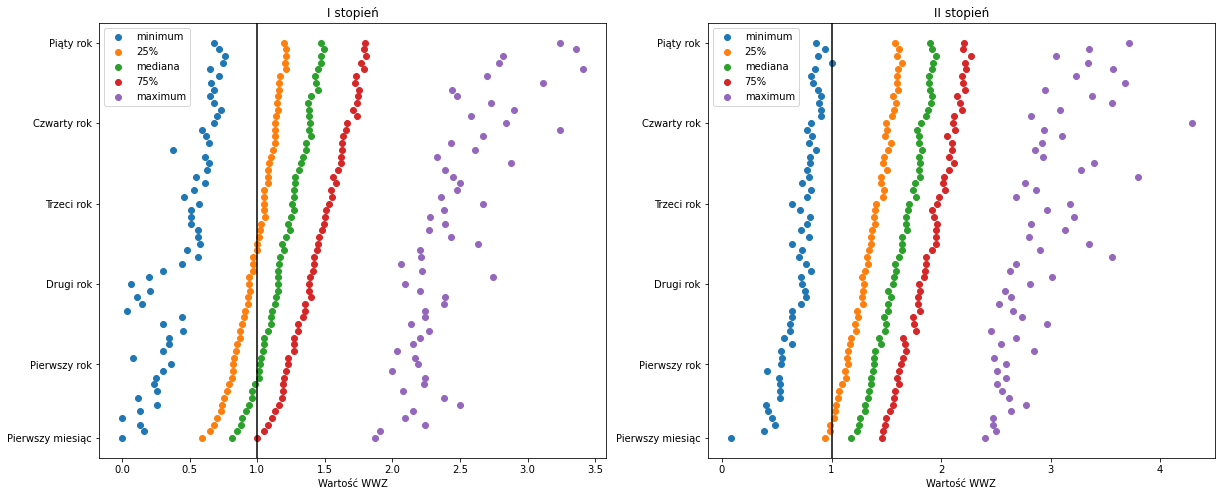

In [521]:
fig, axs = plt.subplots(1, 2)

# I stopień
y = data_bsc.columns[5:]
bsc_description = data_bsc.describe()
x = bsc_description.loc['min'][2:].values
x2 = bsc_description.loc['25%'][2:].values
x3 = bsc_description.loc['50%'][2:].values
x4 = bsc_description.loc['75%'][2:].values
x5 = bsc_description.loc['max'][2:].values

axs[0].scatter(x, y, label='minimum')
axs[0].scatter(x2, y, label='25%')
axs[0].scatter(x3, y, label='mediana')
axs[0].scatter(x4, y, label='75%')
axs[0].scatter(x5, y, label='maximum')

axs[0].axvline(x=1, color='black')

y_ticks = [y[0], y[11], y[23], y[35], y[47], y[59]]
y_labels = ['Pierwszy miesiąc', 'Pierwszy rok', 'Drugi rok', 'Trzeci rok', 'Czwarty rok', 'Piąty rok']
axs[0].set_yticks(y_ticks) # labels=y_labels
axs[0].set_yticklabels(y_labels)
axs[0].set_xlabel('Wartość WWZ')
axs[0].set_title("I stopień")
axs[0].legend()


# II stopień
y = data_msc.columns[5:]
msc_description = data_msc.describe()
x = msc_description.loc['min'][2:].values
x2 = msc_description.loc['25%'][2:].values
x3 = msc_description.loc['50%'][2:].values
x4 = msc_description.loc['75%'][2:].values
x5 = msc_description.loc['max'][2:].values

axs[1].scatter(x, y, label='minimum')
axs[1].scatter(x2, y, label='25%')
axs[1].scatter(x3, y, label='mediana')
axs[1].scatter(x4, y, label='75%')
axs[1].scatter(x5, y, label='maximum')

axs[1].axvline(x=1, color='black')

y_ticks = [y[0], y[11], y[23], y[35], y[47], y[59]]
y_labels = ['Pierwszy miesiąc', 'Pierwszy rok', 'Drugi rok', 'Trzeci rok', 'Czwarty rok', 'Piąty rok']
axs[1].set_yticks(y_ticks) # labels=y_labels
axs[1].set_yticklabels(y_labels)
axs[1].set_xlabel('Wartość WWZ')
axs[1].set_title("II stopień")
axs[1].legend()

fig.show()

In [545]:
matplotlib.rcParams['figure.figsize'] = [12, 5]

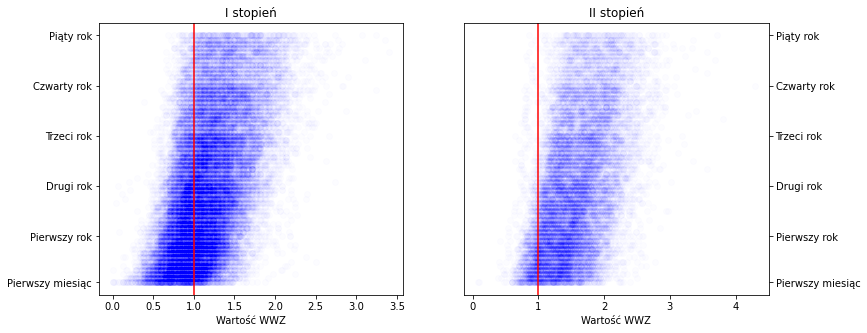

In [546]:
fig, axs = plt.subplots(1, 2)

# I stopień
data_sample = data
for y_ in y:
    axs[0].scatter(data_bsc[y_], [y_]*len(data_bsc['P_WWZ_MIES_1']), alpha=0.01, c='blue')
    axs[1].scatter(data_msc[y_], [y_]*len(data_msc['P_WWZ_MIES_1']), alpha=0.01, c='blue')

axs[0].axvline(x=1, color='red')
axs[1].axvline(x=1, color='red')

y_ticks = [y[0], y[11], y[23], y[35], y[47], y[59]]
y_labels = ['Pierwszy miesiąc', 'Pierwszy rok', 'Drugi rok', 'Trzeci rok', 'Czwarty rok', 'Piąty rok']

axs[0].set_yticks(y_ticks) # labels=y_labels
axs[0].set_yticklabels(y_labels)
axs[0].set_xlabel('Wartość WWZ')
axs[0].set_title("I stopień")

axs[1].set_yticks(y_ticks) # labels=y_labels
axs[1].set_yticklabels(y_labels)
axs[1].set_xlabel('Wartość WWZ')
axs[1].set_title("II stopień")
axs[1].yaxis.tick_right()

# Wnioski

Absolwenci studiów II stopnia zarabiają więcej niż absolwenci studiów stopnia I.

Absolwenci studiów II stopnia przy rozpoczęciu pracy mogą oczekiwać takich samych zarobków jak absolwenci studiów I stopnia z 2 letnim doświadczeniem.
Zarobki absolwentów studiów II stopnia rosną szybciej co widać przy zestawieniu z absolwentami I stopnia z 2 letnim doświadczeniem, zarobki absolwentów II stopnia rosną szybciej.

Trendem w danych jest to że absolwenci studiów II stopnia utrzymują wartość WWZ o ok. 0.4 wyższą niż absolwenci studiów stopnia I w całym badanym czasie.